# Order of rebalance
The order in which they are performed can depend on the specific problem you are trying to solve and the techniques you are using:
- It is recommended to perform __imbalance resampling before preprocessing the data__. Resample can change the distribution of the data, which can affect the results of preprocessing steps such as normalization or feature scaling. By performing imbalance resampling first, you can ensure that the data is representative of the problem you are trying to solve before applying any preprocessing techniques.
- However, it makes sense to perform __preprocessing before imbalance resampling__. If you are using a feature selection technique that is sensitive to the distribution of the data, you may want to perform preprocessing first to ensure that the selected features are representative of the problem you are trying to solve.

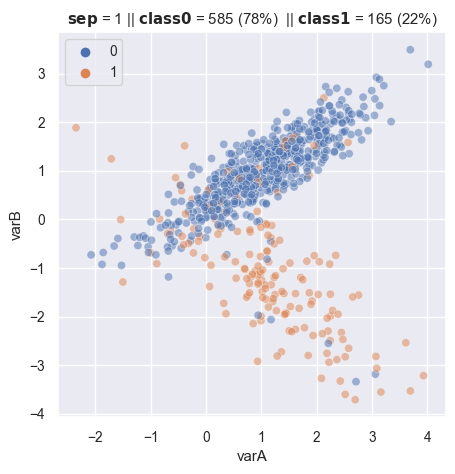

In [1]:
# Create dataset
import warnings
warnings.filterwarnings("ignore")

# Make dataset
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=0.9)

def scat_plot(X, y, sep = None, cols = ['varA', 'varB'], ax = None):
    cnt = y.value_counts()
    title = ""
    if sep is not None:
        title += r'$\bf{'+ 'sep ' + r'}$ = '+ str(sep)
    for i in cnt.index.sort_values():
        title += r" || $\bf{" + f" class {i} " + "}$" + f" = {cnt.loc[i]} ({(100*cnt.loc[i]/len(y)):.0f}%) "
    plt.figure(figsize=(5,5))
    sns.scatterplot(data=X, x=cols[0], y=cols[1], hue=y, ax = ax, alpha=0.5).set(title=title)
    # plt.show()

def make_data(sep, weights = [0.8, 0.2], plot = True, ax = None, random_state = 1, flip_y = 0.1):
    """
    sep : increase the parameter sep, the minority and majority class show less degree of overlap.
    """
    # returns arrays
    X, y = make_classification(n_samples=750,
                           n_features=2,
                           n_redundant=0,
                            n_classes= len(weights),
                           n_clusters_per_class=1,
                           weights=weights,
                           class_sep=sep,# how separate the classes are
                               flip_y= flip_y,
                           random_state=random_state) 
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    if plot:
        scat_plot(X, y, sep = sep, ax = ax)
    return X, y


    
X1, y1 = make_data(1)